In [1]:
# Dependencies
import numpy as np
import pandas as pd 
#import statsmodels.api as sm
#import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.model_selection import KFold
from collections import Counter
import warnings
warnings.simplefilter(action = "ignore") 

In [2]:
# File to Load (Remember to change the path if needed.)
diabetes = "diabetesDB.csv"

# Read the data and store in Dataframe
df = pd.read_csv(diabetes)
df.shape

(945188, 52)

In [3]:
# Create filtered dataframe for only 2015 Data
df = df.loc[( df['iyear'] == 2015 )]
df.shape

(440658, 52)

# Exploratory Data Analysis

In [4]:
# Review nulls
df.isnull().sum()

id               0
_state           0
iyear            0
genhlth          2
physhlth         1
menthlth         0
poorhlth    214211
hlthpln1         0
persdoc2         0
medcost          1
checkup1         1
bphigh4          1
toldhi2      58946
cvdinfr4         0
cvdcrhd4         1
cvdstrk3         0
asthma3          0
asthnow     381389
chccopd1         0
havarth3         1
addepev2         0
chckidny         0
diabete3         0
sex              0
marital          0
educa            0
renthom1         0
employ1          0
smoke100     14195
smokday2    256795
usenow3      14829
avedrnk2    230069
exerany2     35328
scntmny1    371263
scntmel1    367421
adpleasr    420261
addown      420276
adsleep     420286
adenergy    420292
adeat1      420303
adfail      420310
adthink     420324
admove      420339
mistmnt     420354
adanxev     420362
_race            0
_age_g           0
htm4         15294
wtkg3        30739
_bmi5        36191
_frutsum     43530
_vegesum     50921
dtype: int64

In [5]:
# Descriptive statistics of the data
df.describe()

,id,_state,iyear,genhlth,physhlth,menthlth,poorhlth,hlthpln1,persdoc2,medcost,...,admove,mistmnt,adanxev,_race,_age_g,htm4,wtkg3,_bmi5,_frutsum,_vegesum
count,440658.000000,440658.000000,440658.0,440656.000000,440657.000000,440658.000000,226447.000000,440658.000000,440658.000000,440657.000000,...,20319.000000,20304.000000,20296.000000,440658.000000,440658.000000,425364.000000,409919.000000,404467.000000,3.971280e+05,3.897370e+05
mean,220329.500000,29.966981,2015.0,2.577614,60.666906,64.684465,55.773770,1.100620,1.394735,1.915980,...,79.004774,1.878054,1.872192,2.019503,4.444261,169.461593,8092.438394,2804.024534,1.362650e+02,1.947581e+02
std,127207.151797,16.033034,0.0,1.116700,37.054658,35.843267,38.072955,0.508821,0.832276,0.412893,...,25.311006,0.534025,0.583862,2.271043,1.552309,10.564377,2160.837511,665.327551,1.379893e+02,1.556763e+02
min,1.000000,1.000000,2015.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,91.000000,2268.000000,1202.000000,5.397605e-79,5.397605e-79
25%,110165.250000,19.000000,2015.0,2.000000,15.000000,28.000000,10.000000,1.000000,1.000000,2.000000,...,88.000000,2.000000,2.000000,1.000000,3.000000,163.000000,6577.000000,2373.000000,5.700000e+01,1.100000e+02
50%,220329.500000,29.000000,2015.0,2.000000,88.000000,88.000000,88.000000,1.000000,1.000000,2.000000,...,88.000000,2.000000,2.000000,1.000000,5.000000,168.000000,7756.000000,2695.000000,1.000000e+02,1.690000e+02
75%,330493.750000,44.000000,2015.0,3.000000,88.000000,88.000000,88.000000,1.000000,1.000000,2.000000,...,88.000000,2.000000,2.000000,1.000000,6.000000,178.000000,9072.000000,3090.000000,2.000000e+02,2.430000e+02
max,440658.000000,72.000000,2015.0,9.000000,99.000000,99.000000,99.000000,9.000000,9.000000,9.000000,...,99.000000,9.000000,9.000000,9.000000,6.000000,241.000000,28985.000000,9995.000000,1.500000e+04,1.992900e+04


# Data Visualization

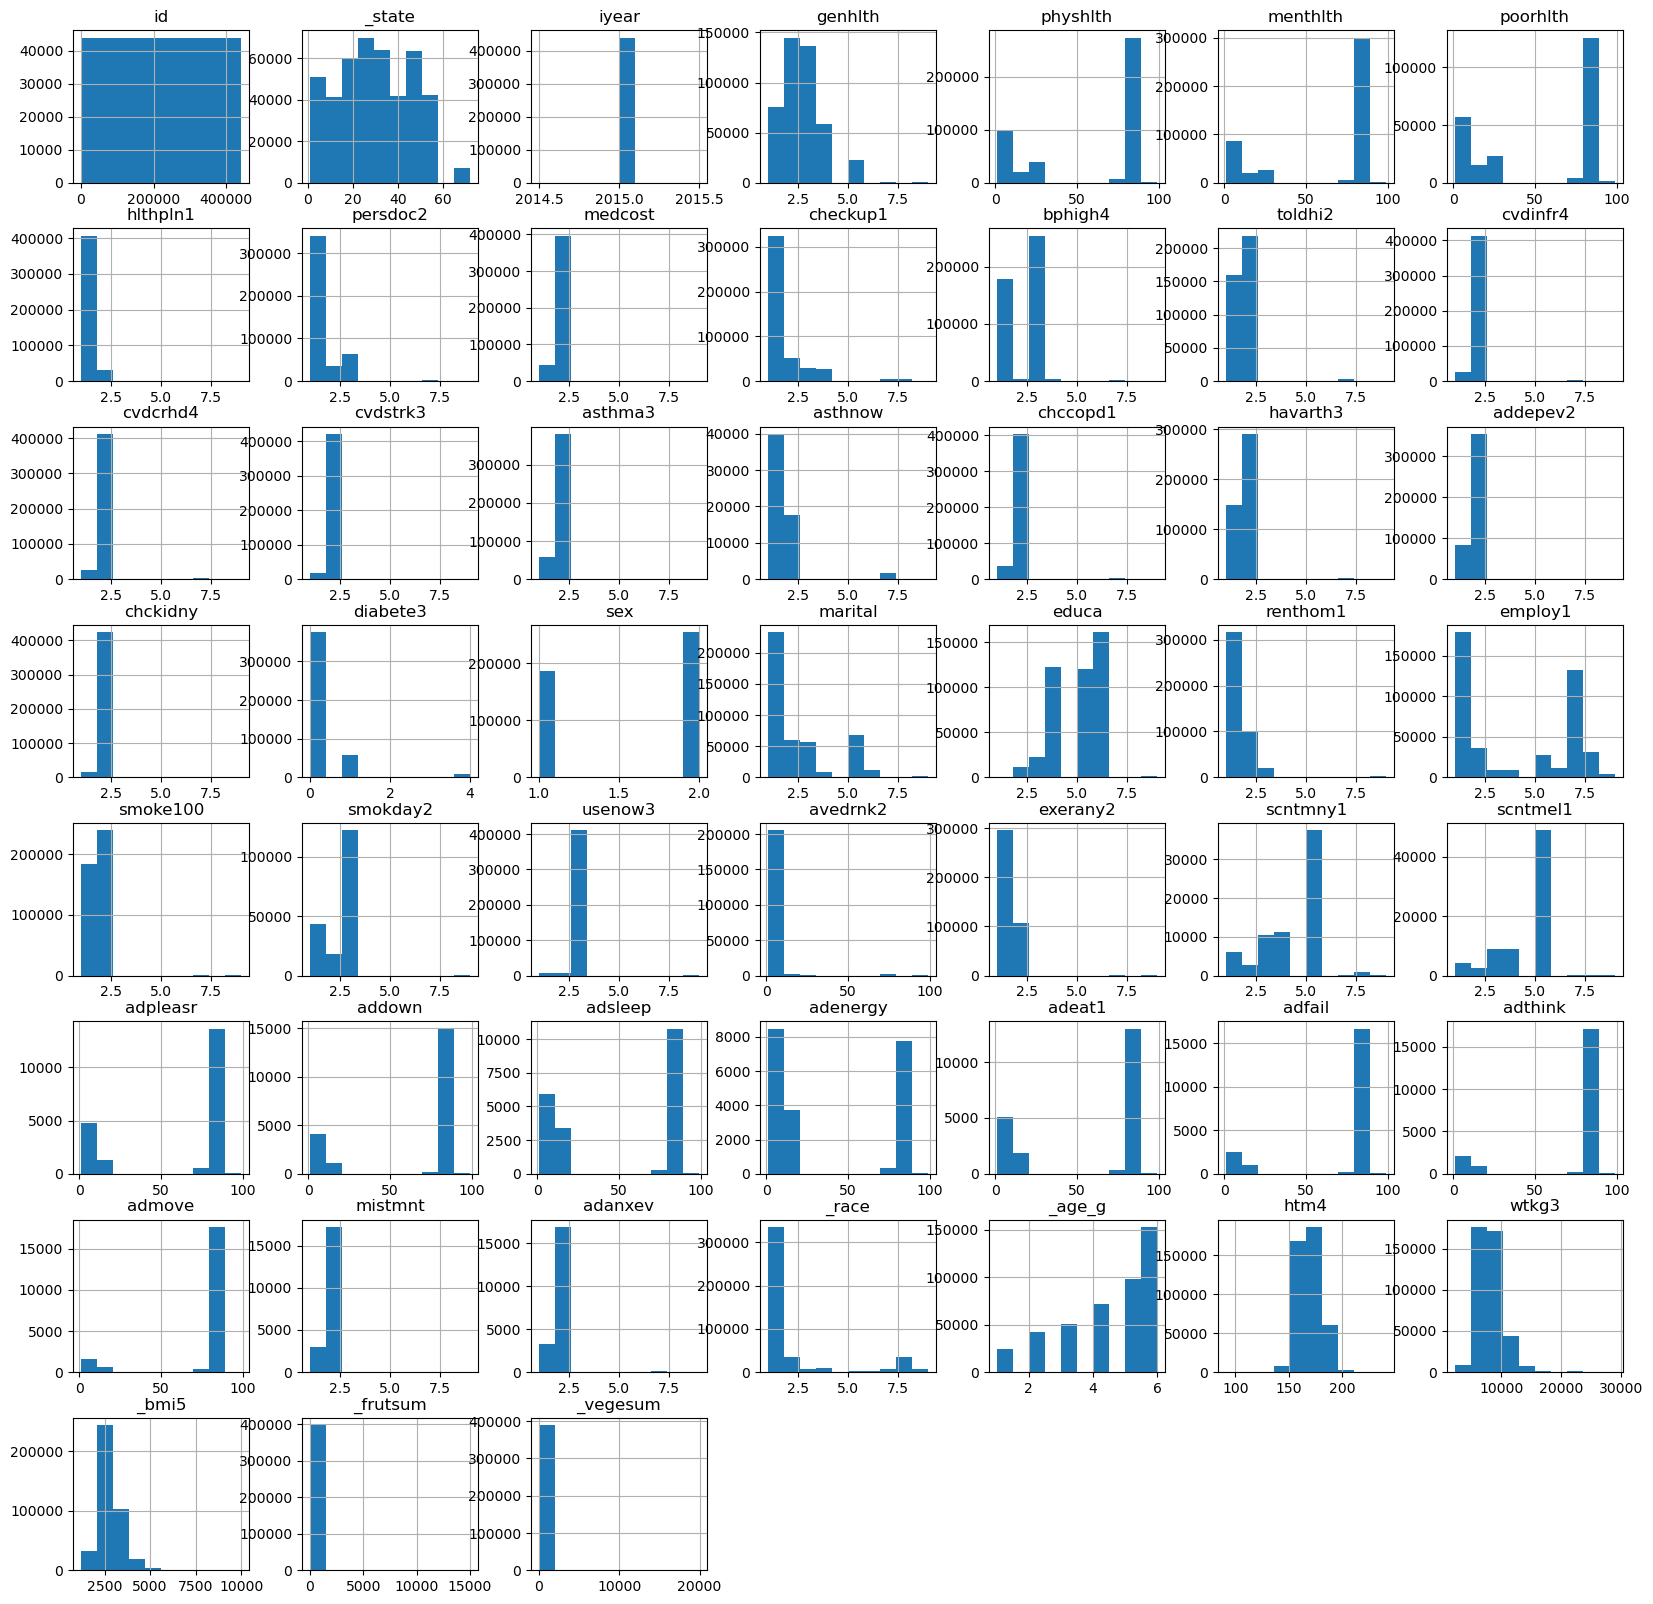

In [6]:
p = df.hist(figsize = (20,20))

In [7]:
# Remove NaN Values from all other fields (Features); replace with a value that is unused in the raw data set
df.fillna(100, inplace=True)

In [8]:
df.isnull().sum()

id          0
_state      0
iyear       0
genhlth     0
physhlth    0
menthlth    0
poorhlth    0
hlthpln1    0
persdoc2    0
medcost     0
checkup1    0
bphigh4     0
toldhi2     0
cvdinfr4    0
cvdcrhd4    0
cvdstrk3    0
asthma3     0
asthnow     0
chccopd1    0
havarth3    0
addepev2    0
chckidny    0
diabete3    0
sex         0
marital     0
educa       0
renthom1    0
employ1     0
smoke100    0
smokday2    0
usenow3     0
avedrnk2    0
exerany2    0
scntmny1    0
scntmel1    0
adpleasr    0
addown      0
adsleep     0
adenergy    0
adeat1      0
adfail      0
adthink     0
admove      0
mistmnt     0
adanxev     0
_race       0
_age_g      0
htm4        0
wtkg3       0
_bmi5       0
_frutsum    0
_vegesum    0
dtype: int64

# Prepare data for Machine Learning

In [9]:
# split the data into X (features) and y (target):

y = df['diabete3']
X = df.drop(columns=['diabete3','id'])
X.describe()

,_state,iyear,genhlth,physhlth,menthlth,poorhlth,hlthpln1,persdoc2,medcost,checkup1,...,admove,mistmnt,adanxev,_race,_age_g,htm4,wtkg3,_bmi5,_frutsum,_vegesum
count,440658.000000,440658.0,440658.000000,440658.000000,440658.000000,440658.000000,440658.000000,440658.000000,440658.000000,440658.000000,...,440658.000000,440658.000000,440658.000000,440658.000000,440658.000000,440658.000000,440658.000000,440658.000000,4.406580e+05,4.406580e+05
mean,29.966981,2015.0,2.578056,60.666996,64.684465,77.272858,1.100620,1.394735,1.916203,1.573538,...,99.031898,95.478879,95.480391,2.019503,4.444261,167.050776,7534.909508,2581.944481,1.326826e+02,1.838081e+02
std,16.033034,0.0,1.135822,37.054663,35.843267,35.121397,0.508821,0.832276,0.438534,1.256077,...,6.994825,20.571697,20.569131,2.271043,1.552309,16.412800,2913.536224,978.517652,1.314426e+02,1.495067e+02
min,1.000000,2015.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,91.000000,100.000000,100.000000,5.397605e-79,5.397605e-79
25%,19.000000,2015.0,2.000000,15.000000,28.000000,88.000000,1.000000,1.000000,2.000000,1.000000,...,100.000000,100.000000,100.000000,1.000000,3.000000,160.000000,6350.000000,2281.000000,6.000000e+01,1.000000e+02
50%,29.000000,2015.0,2.000000,88.000000,88.000000,88.000000,1.000000,1.000000,2.000000,1.000000,...,100.000000,100.000000,100.000000,1.000000,5.000000,168.000000,7711.000000,2645.000000,1.000000e+02,1.530000e+02
75%,44.000000,2015.0,3.000000,88.000000,88.000000,100.000000,1.000000,1.000000,2.000000,2.000000,...,100.000000,100.000000,100.000000,1.000000,6.000000,178.000000,9072.000000,3041.000000,2.000000e+02,2.320000e+02
max,72.000000,2015.0,100.000000,100.000000,99.000000,100.000000,9.000000,9.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,9.000000,6.000000,241.000000,28985.000000,9995.000000,1.500000e+04,1.992900e+04


In [10]:
# check balance of target column
y.value_counts()

0    375712
1     57256
4      7690
Name: diabete3, dtype: int64

In [11]:
# Transform y values to 0 = no diabetes; 1 = yes, diabetes.  Per BRFSS codebook 4 = prediabetes and we consider this as 'yes, diabetes'

y = y.replace({4:1})
y.value_counts()

0    375712
1     64946
Name: diabete3, dtype: int64

In [12]:
# Split into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33)

Counter(y_train)

Counter({1: 43408, 0: 251832})

In [13]:
# Scale the data

scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [14]:
# Create and fit RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=128)
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=128)

In [15]:
# Make predictions
predictions = rfc.predict(X_test_scaled)

# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)
print(acc_score)

0.8606981254040078


In [16]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[121354   2526]
 [ 17731   3807]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92    123880
           1       0.60      0.18      0.27     21538

    accuracy                           0.86    145418
   macro avg       0.74      0.58      0.60    145418
weighted avg       0.83      0.86      0.83    145418



In [17]:
# Calculate Feature importances
rfc.feature_importances_

array([0.06228509, 0.        , 0.05211968, 0.03008311, 0.02380152,
       0.02745085, 0.00452799, 0.01243416, 0.00679106, 0.01329134,
       0.04464944, 0.03055901, 0.00946739, 0.01028357, 0.00700597,
       0.0072119 , 0.0090484 , 0.00845576, 0.0145341 , 0.01032598,
       0.00867918, 0.0096445 , 0.02519765, 0.02833511, 0.01351484,
       0.03163985, 0.01240848, 0.01677237, 0.00583072, 0.02301897,
       0.01569137, 0.01171589, 0.01117666, 0.00244085, 0.00207026,
       0.0027724 , 0.00307131, 0.00264751, 0.0018252 , 0.00181119,
       0.00173168, 0.0015537 , 0.00158951, 0.01942449, 0.02940579,
       0.04863076, 0.06907238, 0.08689175, 0.05756331, 0.06954601])

(<AxesSubplot:>,)

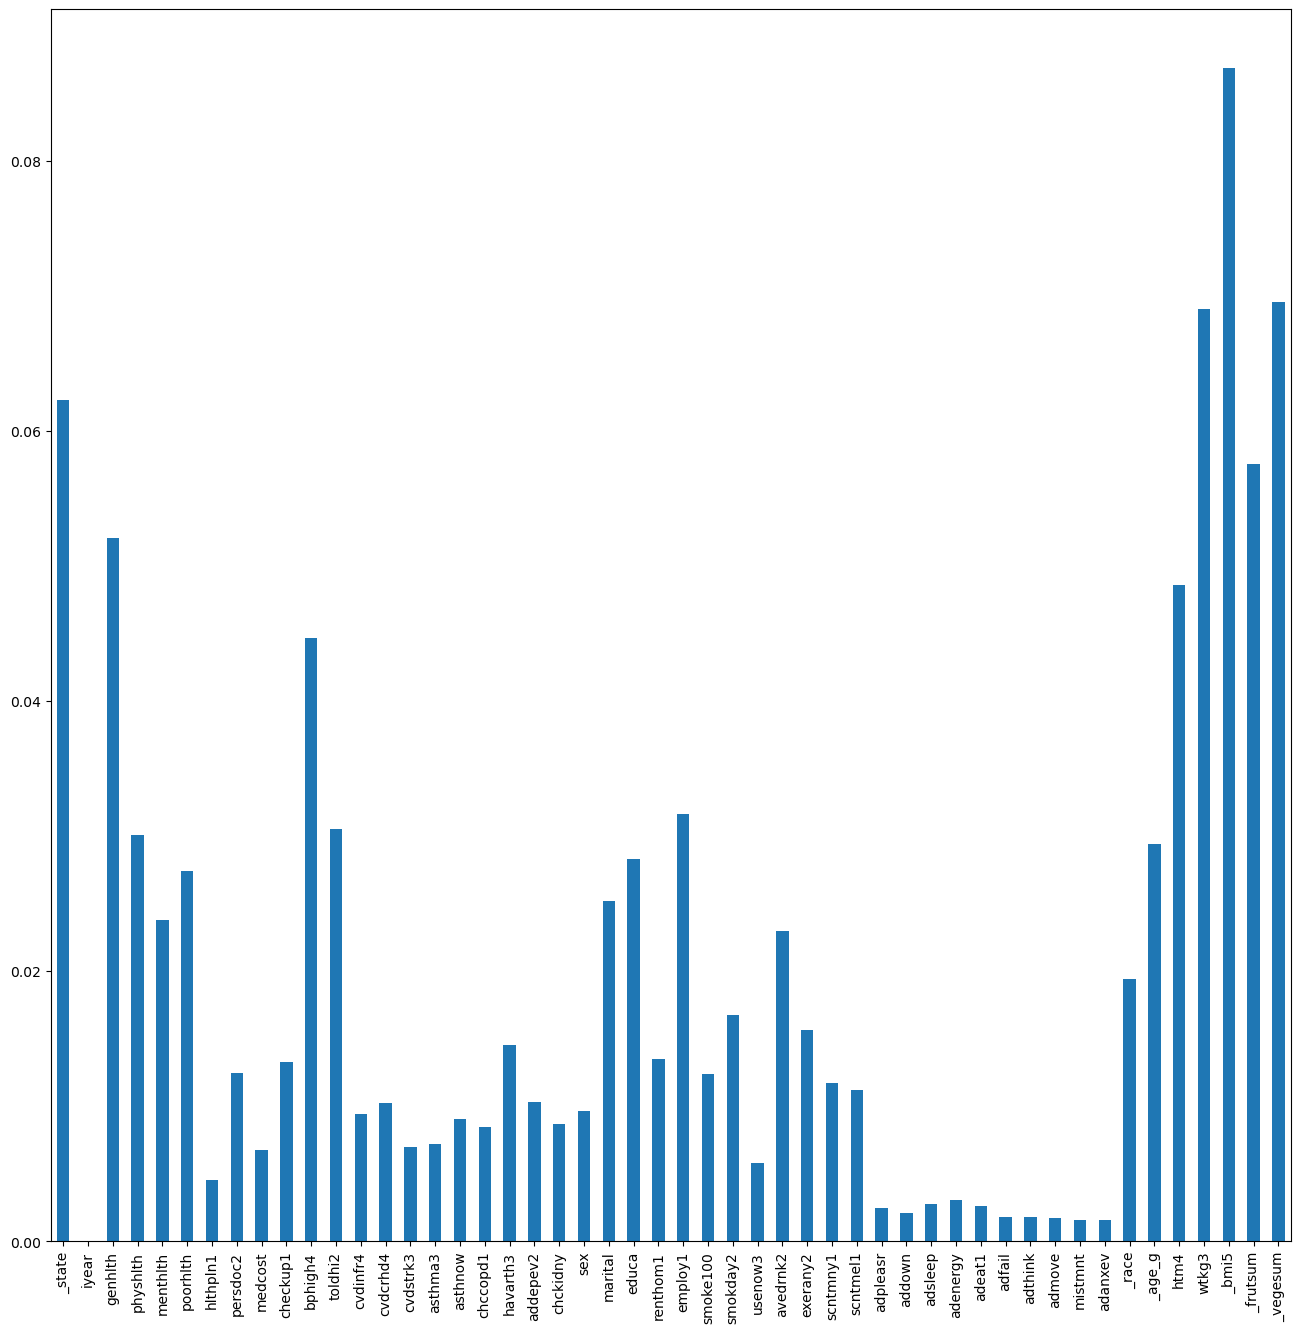

In [18]:
# Plot importances
(pd.Series(rfc.feature_importances_, index=X.columns,).plot(kind='bar', figsize=(16,16)), )

In [19]:
# Based on above importances, reduce the Features to the top 20 most imporantant

index_values = X.columns.to_list()
column_values = ["importance"]
importances = pd.DataFrame(data = rfc.feature_importances_, 
                  index = index_values, 
                  columns = column_values)

importances.sort_values('importance', ascending = False, inplace= True)
importances.head()

,importance
_bmi5,0.086892
_vegesum,0.069546
wtkg3,0.069072
_state,0.062285
_frutsum,0.057563


In [20]:
top_20 = importances[0:20]
top_20

,importance
_bmi5,0.086892
_vegesum,0.069546
wtkg3,0.069072
_state,0.062285
_frutsum,0.057563
genhlth,0.052120
htm4,0.048631
bphigh4,0.044649
employ1,0.031640
toldhi2,0.030559


In [21]:
cut = importances[20:]
cut

,importance
havarth3,0.014534
renthom1,0.013515
checkup1,0.013291
persdoc2,0.012434
smoke100,0.012408
scntmny1,0.011716
scntmel1,0.011177
addepev2,0.010326
cvdcrhd4,0.010284
sex,0.009644


In [22]:
to_cut = cut.index.to_list()
to_cut

['havarth3',
 'renthom1',
 'checkup1',
 'persdoc2',
 'smoke100',
 'scntmny1',
 'scntmel1',
 'addepev2',
 'cvdcrhd4',
 'sex',
 'cvdinfr4',
 'asthnow',
 'chckidny',
 'chccopd1',
 'asthma3',
 'cvdstrk3',
 'medcost',
 'usenow3',
 'hlthpln1',
 'adenergy',
 'adsleep',
 'adeat1',
 'adpleasr',
 'addown',
 'adfail',
 'adthink',
 'admove',
 'adanxev',
 'mistmnt',
 'iyear']

In [23]:
# Create new X data with only important columns

X = X.drop(columns=to_cut)
X.head()

,_state,genhlth,physhlth,menthlth,poorhlth,bphigh4,toldhi2,marital,educa,employ1,smokday2,avedrnk2,exerany2,_race,_age_g,htm4,wtkg3,_bmi5,_frutsum,_vegesum
0,1,5.0,15.0,18,10.0,1.0,1.0,1.0,4.0,8.0,3.0,100.0,2.0,1.0,5,178.0,12701.0,4018.0,50.0,217.0
1,1,3.0,88.0,88,100.0,3.0,2.0,2.0,6.0,3.0,1.0,100.0,1.0,1.0,4,173.0,7484.0,2509.0,24.0,78.0
2,1,4.0,15.0,88,88.0,3.0,1.0,2.0,4.0,7.0,100.0,100.0,100.0,1.0,6,180.0,7167.0,2204.0,100.0,100.0
3,1,5.0,30.0,30,30.0,1.0,1.0,1.0,4.0,8.0,100.0,100.0,2.0,1.0,5,170.0,8165.0,2819.0,100.0,20.0
4,1,5.0,20.0,88,30.0,3.0,2.0,1.0,5.0,8.0,100.0,100.0,2.0,1.0,5,163.0,6441.0,2437.0,100.0,200.0


In [24]:
# Re-run model

# Split into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33)

Counter(y_train)

Counter({0: 251825, 1: 43415})

In [25]:
# Scale the data

scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [26]:
# Create and fit RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=128)
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=128)

In [27]:
# Make predictions
predictions = rfc.predict(X_test_scaled)

# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)
print(acc_score)

0.8589170529095436


In [28]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[121004   2883]
 [ 17633   3898]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92    123887
           1       0.57      0.18      0.28     21531

    accuracy                           0.86    145418
   macro avg       0.72      0.58      0.60    145418
weighted avg       0.83      0.86      0.83    145418



In [29]:
# Simplified set of 20 features performs as well in the random forest classifier as the original 53 columns.

In [30]:
# For segment 3:
# Review other machine learning models; can we further downselect features?
# Right now, even if we re-run and re-run the jupyter notebook, the top 20 features remain constant even if we look at 2011 data instead of 2015
# At what number of features does that not remain true?

In [31]:
# Calculate Feature importances
rfc.feature_importances_

array([0.08749946, 0.0590351 , 0.03837252, 0.03137509, 0.03430818,
       0.05002061, 0.03191665, 0.03300817, 0.03652546, 0.03836461,
       0.0253709 , 0.02635669, 0.02010723, 0.02317867, 0.03541226,
       0.06236388, 0.08577959, 0.10820521, 0.07737435, 0.09542537])

(<AxesSubplot:>,)

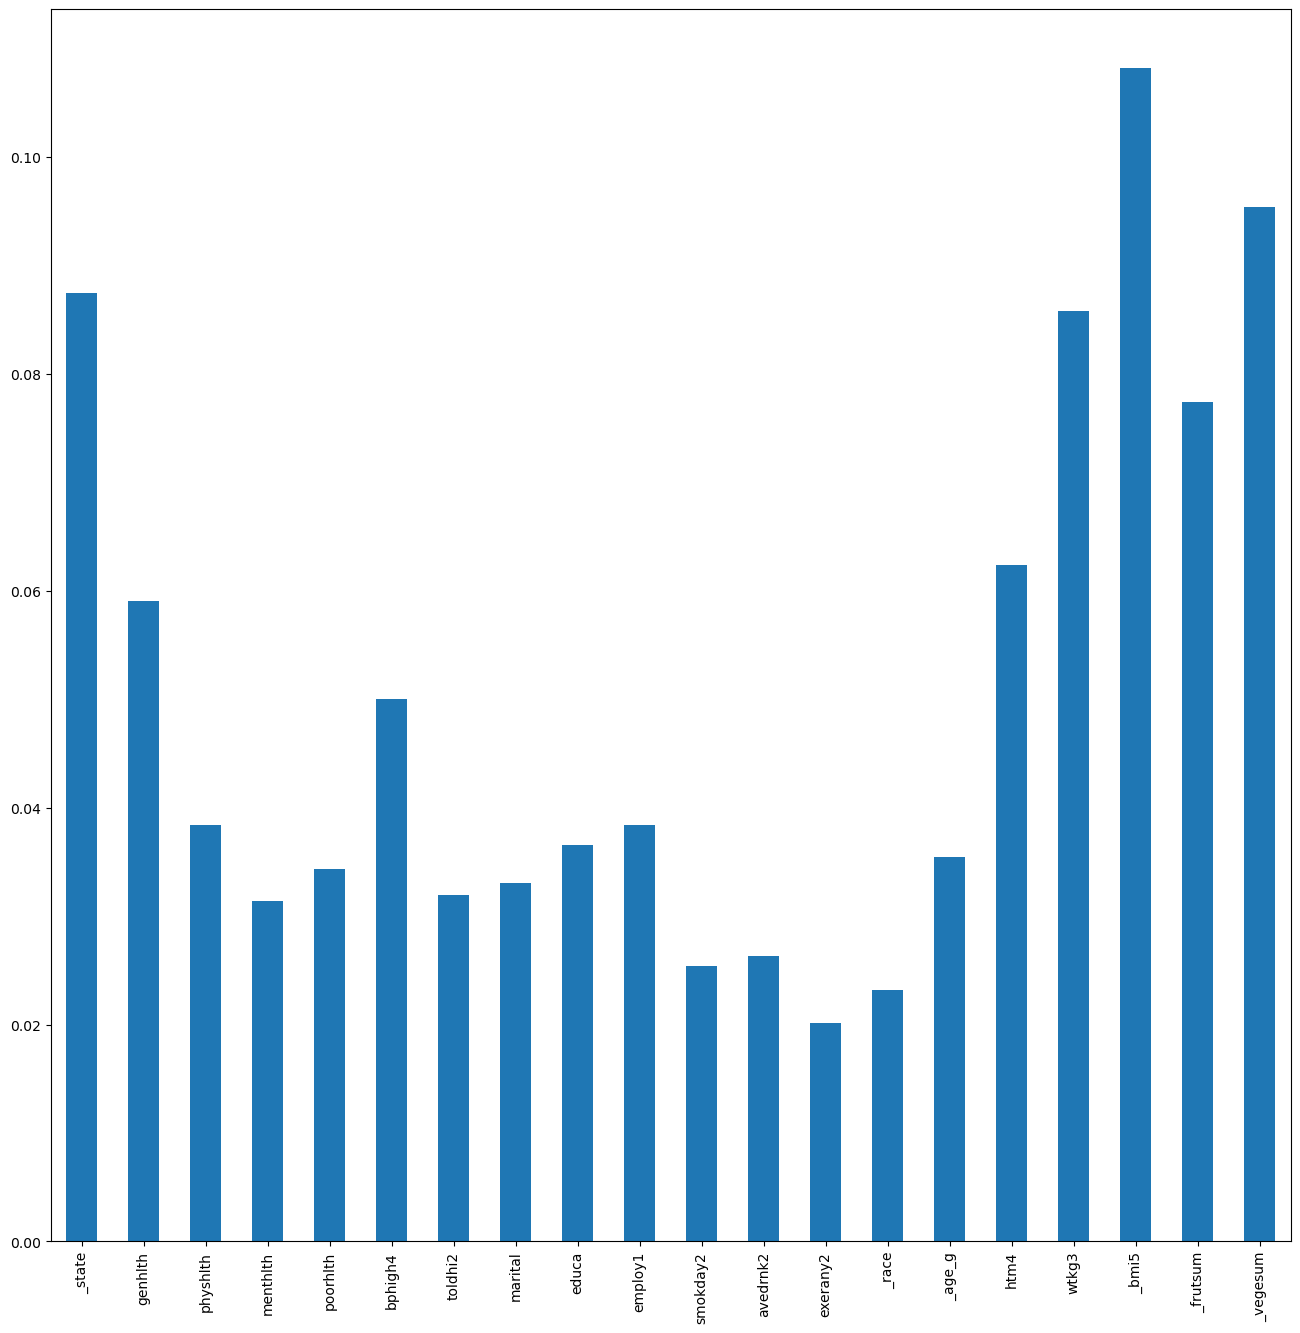

In [32]:
# Plot importances
(pd.Series(rfc.feature_importances_, index=X.columns,).plot(kind='bar', figsize=(16,16)), )

In [33]:
index_values = X.columns.to_list()
column_values = ["importance"]
importances = pd.DataFrame(data = rfc.feature_importances_, 
                  index = index_values, 
                  columns = column_values)

importances.sort_values('importance', ascending = False, inplace= True)
importances.head()

,importance
_bmi5,0.108205
_vegesum,0.095425
_state,0.087499
wtkg3,0.085780
_frutsum,0.077374


In [34]:
top_10 = importances[0:10]
top_10

,importance
_bmi5,0.108205
_vegesum,0.095425
_state,0.087499
wtkg3,0.085780
_frutsum,0.077374
htm4,0.062364
genhlth,0.059035
bphigh4,0.050021
physhlth,0.038373
employ1,0.038365


In [35]:
cut = importances[10:]
cut

,importance
educa,0.036525
_age_g,0.035412
poorhlth,0.034308
marital,0.033008
toldhi2,0.031917
menthlth,0.031375
avedrnk2,0.026357
smokday2,0.025371
_race,0.023179
exerany2,0.020107


In [36]:
to_cut = cut.index.to_list()
to_cut

['educa',
 '_age_g',
 'poorhlth',
 'marital',
 'toldhi2',
 'menthlth',
 'avedrnk2',
 'smokday2',
 '_race',
 'exerany2']

In [37]:
# Create new X data with only important columns

X = X.drop(columns=to_cut)
X.head()

,_state,genhlth,physhlth,bphigh4,employ1,htm4,wtkg3,_bmi5,_frutsum,_vegesum
0,1,5.0,15.0,1.0,8.0,178.0,12701.0,4018.0,50.0,217.0
1,1,3.0,88.0,3.0,3.0,173.0,7484.0,2509.0,24.0,78.0
2,1,4.0,15.0,3.0,7.0,180.0,7167.0,2204.0,100.0,100.0
3,1,5.0,30.0,1.0,8.0,170.0,8165.0,2819.0,100.0,20.0
4,1,5.0,20.0,3.0,8.0,163.0,6441.0,2437.0,100.0,200.0


In [38]:
# Re-run model

# Split into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33)

Counter(y_train)

Counter({1: 43357, 0: 251883})

In [39]:
# Scale the data

scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [40]:
# Create and fit RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=128)
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=128)

In [41]:
# Make predictions
predictions = rfc.predict(X_test_scaled)

# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)
print(acc_score)

0.8505136915650057


In [42]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[120118   3711]
 [ 18027   3562]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92    123829
           1       0.49      0.16      0.25     21589

    accuracy                           0.85    145418
   macro avg       0.68      0.57      0.58    145418
weighted avg       0.81      0.85      0.82    145418



In [43]:
# State continues to be an important feature, but we think that it may not be a true causal factor.  We will drop state and re-run the analysis.

X = X.drop(columns=['_state'])

# Split into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33)

# Scale the data
scaler = StandardScaler()

# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create and fit RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=128)
rfc.fit(X_train_scaled, y_train)


RandomForestClassifier(n_estimators=128)

In [44]:
# Make predictions
predictions = rfc.predict(X_test_scaled)

# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)
print(acc_score)

0.8463257643482925


In [45]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[119210   4579]
 [ 17768   3861]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91    123789
           1       0.46      0.18      0.26     21629

    accuracy                           0.85    145418
   macro avg       0.66      0.57      0.59    145418
weighted avg       0.81      0.85      0.82    145418



In [46]:
rfc.feature_importances_

array([0.06190463, 0.07343826, 0.06233379, 0.05890905, 0.08465721,
       0.12009697, 0.16265557, 0.15592061, 0.22008391])

(<AxesSubplot:>,)

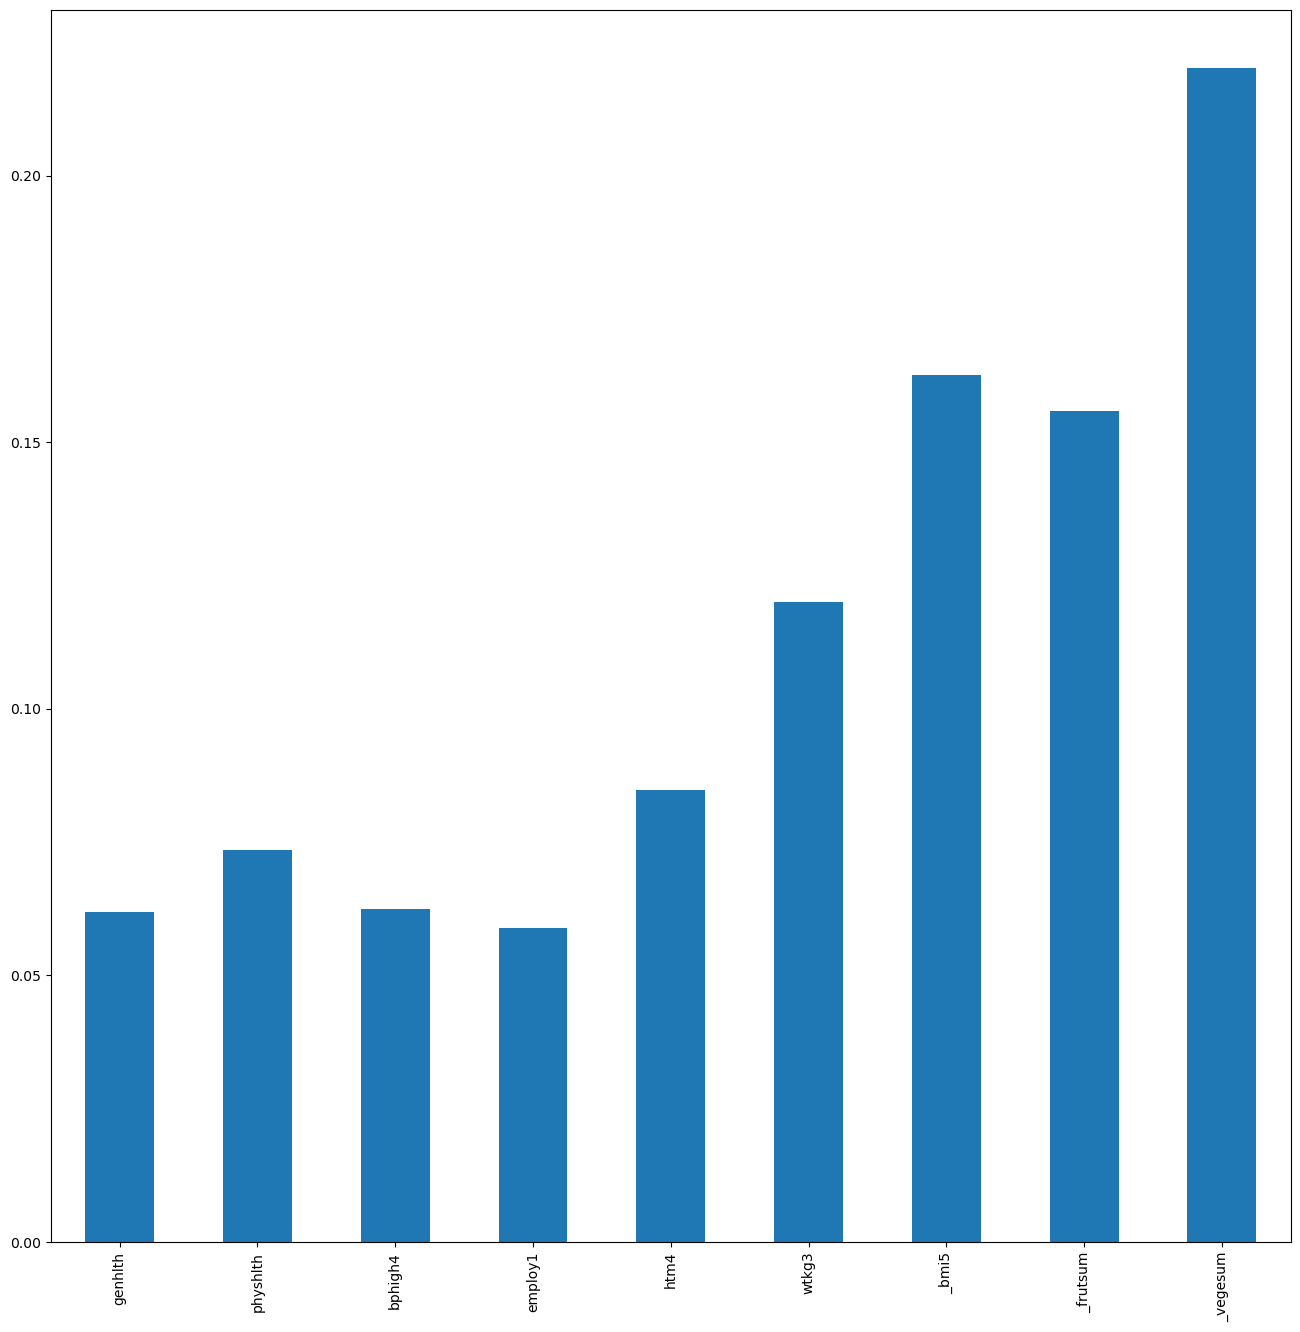

In [47]:
# Plot importances
(pd.Series(rfc.feature_importances_, index=X.columns,).plot(kind='bar', figsize=(16,16)), )

In [48]:
# Height and weight together are used to calculate BMI.  Does the model work as well if we drop height and weight, and focus in on BMI as the important feature?

X = X.drop(columns=['htm4','wtkg3'])

# Split into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33)

# Scale the data
scaler = StandardScaler()

# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create and fit RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=128)
rfc.fit(X_train_scaled, y_train)



RandomForestClassifier(n_estimators=128)

In [49]:
# Make predictions
predictions = rfc.predict(X_test_scaled)

# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)
print(acc_score)

0.8446891031371632


In [50]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[118806   5049]
 [ 17536   4027]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91    123855
           1       0.44      0.19      0.26     21563

    accuracy                           0.84    145418
   macro avg       0.66      0.57      0.59    145418
weighted avg       0.81      0.84      0.82    145418



In [51]:
rfc.feature_importances_

array([0.06110349, 0.07261229, 0.05854458, 0.05569146, 0.31545555,
       0.17181215, 0.26478049])

(<AxesSubplot:>,)

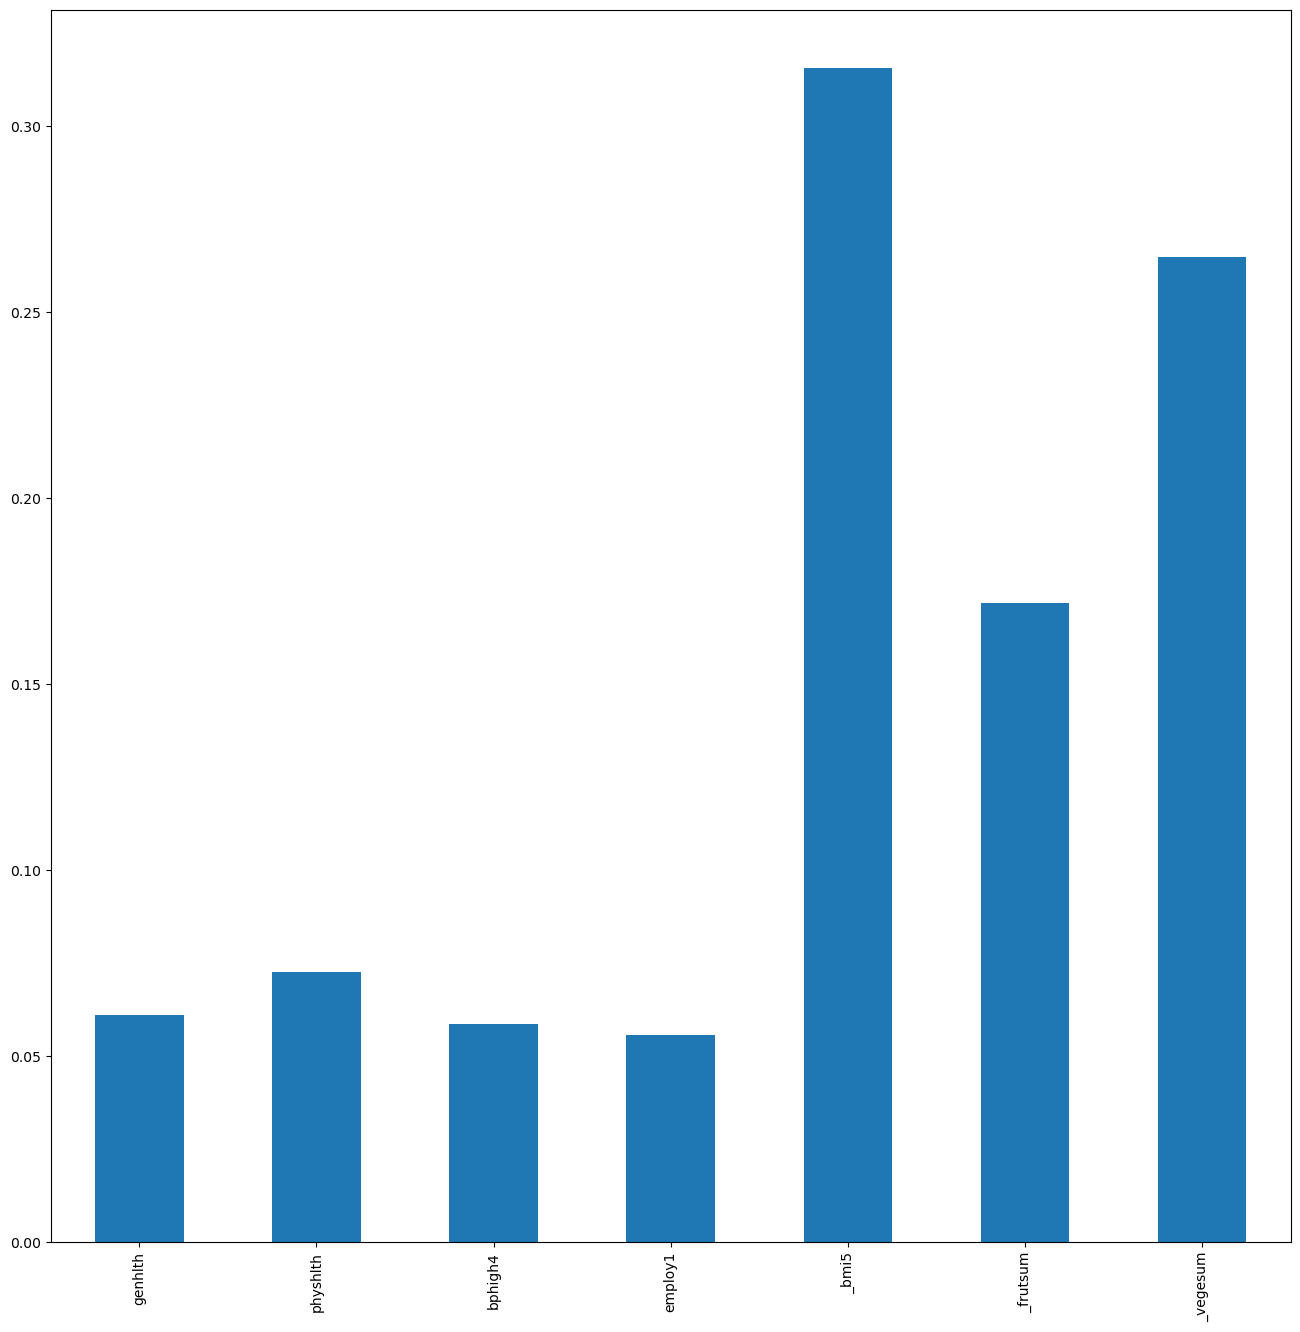

In [52]:
# Plot importances
(pd.Series(rfc.feature_importances_, index=X.columns,).plot(kind='bar', figsize=(16,16)), )